<a href="https://colab.research.google.com/github/Imashish-45/EDA-1-Google_playstore_analysis/blob/main/playstore_analysis_EDA(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.


## **Each app has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.**

In [1]:
# importing the important  python libraries

import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


we have got two datasets that is Play Store Analysis and User reviews

In [2]:
# Reading the dataset from the files

playstore_data = pd.read_csv("/content/Play Store Data (1).csv")

user_review = pd.read_csv("/content/User Reviews (1).csv")

In [3]:
# exploring the dataset

playstore_data.head(2).T

,0,1
App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana
Category,ART_AND_DESIGN,ART_AND_DESIGN
Rating,4.1,3.9
Reviews,159,967
Size,19M,14M
Installs,"10,000+","500,000+"
Type,Free,Free
Price,0,0
Content Rating,Everyone,Everyone
Genres,Art & Design,Art & Design;Pretend Play


In [4]:
user_review.head(2).T

,0,1
App,10 Best Foods for You,10 Best Foods for You
Translated_Review,I like eat delicious food. That's I'm cooking ...,This help eating healthy exercise regular basis
Sentiment,Positive,Positive
Sentiment_Polarity,1.0,0.25
Sentiment_Subjectivity,0.533333,0.288462


In [5]:
playstore_data.shape

(10841, 13)

In [6]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Let us first define what information the columns contain based on our inspection. play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

App - It tells us about the name of the application with a short description (optional).

Category - It gives the category to the app.

Rating - It contains the average rating the respective app received from its users.

Reviews - It tells us about the total number of users who have given a review for the application.

Size - It tells us about the size being occupied the application on the mobile phone.

Installs - It tells us about the total number of installs/downloads for an application.

Type - IIt states whether an app is free to use or paid.

Price - It gives the price payable to install the app. For free type apps, the price is zero.

Content Rating - It states whether or not an app is suitable for all age groups or not.

Genres - It tells us about the various other categories to which an application can belong.

Last Updated - It tells us about the when the application was updated.

Current Ver - It tells us about the current version of the application.

13.Android Ver - It tells us about the android version which can support the application on its platform.

In [8]:
# Statistical inference from a dataset 
playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


As we can see that there some columns having NaN or non-Null values , So it becomes essential to Clean the data before proceeding with Analysis

DATA CLEANING

We will mostly be working with these columns: "Rating", "Size", "Installs", "Price".First we clean up all the nan values in this column, either replace them with some other value or remove all the special characters that are present in the particular column. Let's clean up by removing these and converting each column to a numeric type.

In [9]:

playstore_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [10]:
#  create a dataframe to gain insight into the data

ps_df = pd.DataFrame(index = playstore_data.columns)
ps_df["data_type"] = playstore_data.dtypes
ps_df["null count"] = playstore_data.isnull().sum()

In [11]:
ps_df

,data_type,null count
App,object,0
Category,object,0
Rating,float64,1474
Reviews,object,0
Size,object,0
Installs,object,0
Type,object,1
Price,object,0
Content Rating,object,1
Genres,object,0


As we can see from above DataFrame that following columns has null values:



*   Rating has 1474 null values.
*   Type and Content Rating has 1 null value each.
*   Current Ver and Android Ver has 8 and 3 null    
    values respectively.




<!-- Reviews,Size, Intalls, and Price have default datatypes. We want to convert them into numeric datatypes. and removed all the special characters present in these columns, which made them default datatype. -->

let's handle the NaN values

In [12]:
# For finding Outliers we can use Boxplot 
# we would first check the Rating column as it has most number of null values.

Text(0.5, 1.0, 'checking the outliers in the Rating')

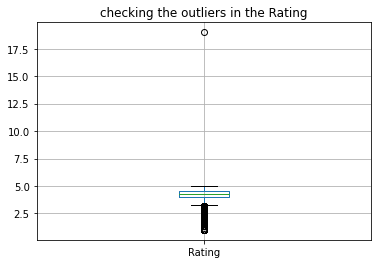

In [13]:
playstore_data.boxplot()
plt.title("checking the outliers in the Rating")


Box Plot is used to show the distribution of Numeric data through their quartile.

Rating could have maximum value of 5 but by above plot we can see there are outliers(above 5 ratings) present in the Rating column.

In [14]:
# finding the outliers 

In [15]:
# There is no app having Rating less than 1

playstore_data[(playstore_data["Rating"]<1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
playstore_data[(playstore_data["Rating"]<1) | (playstore_data["Rating"]>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
# App having rating above 5

playstore_data[(playstore_data["Rating"]>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As we can see in the Row no.10472 ; the Rating is 19 which is practically impossible and it also has NaN value in Content Rating and Android Ver.

this row is of no use and Therefore we need to drop this row.

In [18]:
playstore_data.drop(10472,axis = 0 , inplace = True)

Text(0.5, 1.0, 'checking the outliers')

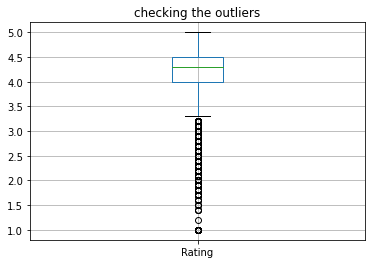

In [19]:
# checking the outliers now after droping the one outlier.

playstore_data.boxplot()
plt.title("checking the outliers")

As now we can see the Rating column has been densed now ( central tedency).


In [20]:
# lets fill the NaN values now by mean and median of the data
mean_rating = playstore_data["Rating"].mean()

print(f'The mean of Rating is {mean_rating} ')

The mean of Rating is 4.191757420456972 


In [21]:
median_rating = playstore_data["Rating"].median()

print(f'The median of Rating is {median_rating}')

The median of Rating is 4.3




1. The mean of Rating Column comes to be 4.2

2. The Median of Rating Column comes to be 4.3

There is very minor difference between mean and median, so we will replace all the null values with median because it shows that 50% of apps have more than 4.3.



In [22]:
playstore_data["Rating"].fillna(value = median_rating, inplace = True)

In [23]:
# checking for null values

playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

** All the null values of Rating column has been replaced by median.**
 
 Now let's handle the null values of other columns,
 starting with Type column

In [24]:
playstore_data[(playstore_data["Type"].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


 As we can see that the 9148th row has Nan value in Type column but its price is zero 
 and hence it falls under "Free" Type.
 now filling the Nan value with Free

In [26]:
playstore_data["Type"].fillna(value = "Free"  , inplace = True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [27]:
#  Hence there is no null values present in Type column .

playstore_data[(playstore_data["Type"].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [28]:
# Row Number 9148 has no NaN value now

playstore_data.iloc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  4.3
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [29]:
#  checking the NaN values of Current Ver as it has 8 NaN values.

playstore_data[(playstore_data["Current Ver"].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [30]:
# dropping the NaN values of Current Ver column:

playstore_data.drop([15,1553,6322,6803,7333,7407,7730,10342 ], axis = 0 , inplace = True)

In [31]:
# Inference : there is no NaN value present in Current Ver

playstore_data[(playstore_data["Current Ver"].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [32]:
playstore_data[(playstore_data["Android Ver"].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [33]:
playstore_data.drop([4453 , 4490 ] , axis = 0 , inplace = True)

In [34]:
playstore_data[(playstore_data["Android Ver"].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [35]:
# pd_check = pd.DataFrame(index = playstore_data.columns)

# pd_check["data type"] = playstore_data.dtypes
# pd_check["null count"] = playstore_data.isnull().sum()

# remove it after completion of project

Handling the Duplicate values

In [36]:
playstore_data.shape

(10830, 13)

In [37]:
# DataFrame overview

playstore_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [38]:



playstore_data["App"].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [39]:
#  duplicates present are:


playstore_data["App"].duplicated().sum()

1181

As we can see the  presence of 1181 dupplicate

In [40]:
# dropping the duplicates in the dataset

playstore_data.drop_duplicates( subset = "App" , inplace = True)

In [41]:
# no duplicates are present now

playstore_data["App"].duplicated().sum()

0

# Data Preprocessing




### Handling  Different Data Types :

In [42]:
playstore_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [43]:
playstore_data["Size"].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

it is being clearly seen that the size column contains data with different unit like 'k' or 'M'. for uniform analysis it must be in one unit.

In [44]:

playstore_data["Price"].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In the price column , we can see that $ sign is present which is unwanted for the process


In [45]:
playstore_data["Installs"].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

'+' and ',' is an unwanted sign appearing as a unit in our data values . it should be removed for Data Analysis.

In [46]:
# we want to Replace all the unwanted character to convert datatye to numeric 
def clean(num):
  """This function takes a string and replace the following characters if present, '+', ',' ,'$', 'M', 'k', 'NaN'"""
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'M' in num:
    num = str(int(float(num.replace('M',''))*1000000))
  if 'k' in num:
    num = str(int(float(num.replace('k',''))*1000))
  if 'NaN' in num:
    num = '0'
  else:
    pass
  return num

In [47]:
# Converting the 'Reviews' column Data into valid numeric Data
playstore_data["Reviews"] = pd.to_numeric(playstore_data["Reviews"])

# Converting the 'Size' column Data into valid numeric Data
playstore_data["Size"] = playstore_data["Size"].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_data["Size"] = pd.to_numeric(playstore_data["Size"].map(lambda x: clean(x)))

# Converting the 'Installs' column Data into valid numeric Data
playstore_data["Installs"] = pd.to_numeric(playstore_data["Installs"].map(lambda x: clean(x)))


In [48]:
# Converting the 'Price' column Data into valid numeric Data
playstore_data["Price"] = pd.to_numeric (playstore_data["Price"].map(lambda x:clean(x)))

In [49]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            9649 non-null   int64  
 5   Installs        9649 non-null   int64  
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.0+ MB


## Data Cleaning on User review Dataset

In [50]:
user_rv = pd.read_csv("/content/User Reviews (1).csv")

In [51]:
user_rv.shape

(64295, 5)

In [52]:
user_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [53]:
user_rv.columns


Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

First lets have a look that what column names mean to be identified -:

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

**App**: Contains the name of the app with a short description (optional).

**Translated_Review**: It contains the English translation of the review dropped by the user of the app.

**Sentiment**: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.

**Sentiment_Polarity** : It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.

Sentiment_Subjectivity : This value gives how close a reviewers opinion is to the opinion of the general public. Its range is[0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

In [54]:
#  statistical details

user_rv.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# Handling NaN Values

In [55]:
#  DataFrame to evaluate the user review data types and null count

ur_df = pd.DataFrame(index = user_rv.columns)

In [56]:
ur_df["Data type"] = user_rv.dtypes

In [57]:
ur_df["null count"]= user_rv.isnull().sum()

In [58]:
ur_df

,Data type,null count
App,object,0
Translated_Review,object,26868
Sentiment,object,26863
Sentiment_Polarity,float64,26863
Sentiment_Subjectivity,float64,26863


As we can see except App column all the four columns contains 26863 null values.

In [59]:
# starting with sentiment column

user_rv[(user_rv["Sentiment"].isnull())]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [60]:

user_rv["Sentiment"].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

As we can see the huge number of NaN values are present hence we need to drop it as we cant replace the categorical values.

In [61]:
user_rv.dropna(inplace = True)

In [62]:
user_rv.shape

(37427, 5)

In [63]:
user_rv.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


Hence the values in the all the columns appears fine now .
we can now analyse or examine the dataset by different user friendly visualisation


# **Exploratory Data Analysis**

# Category wise Apps Share % in playstore?

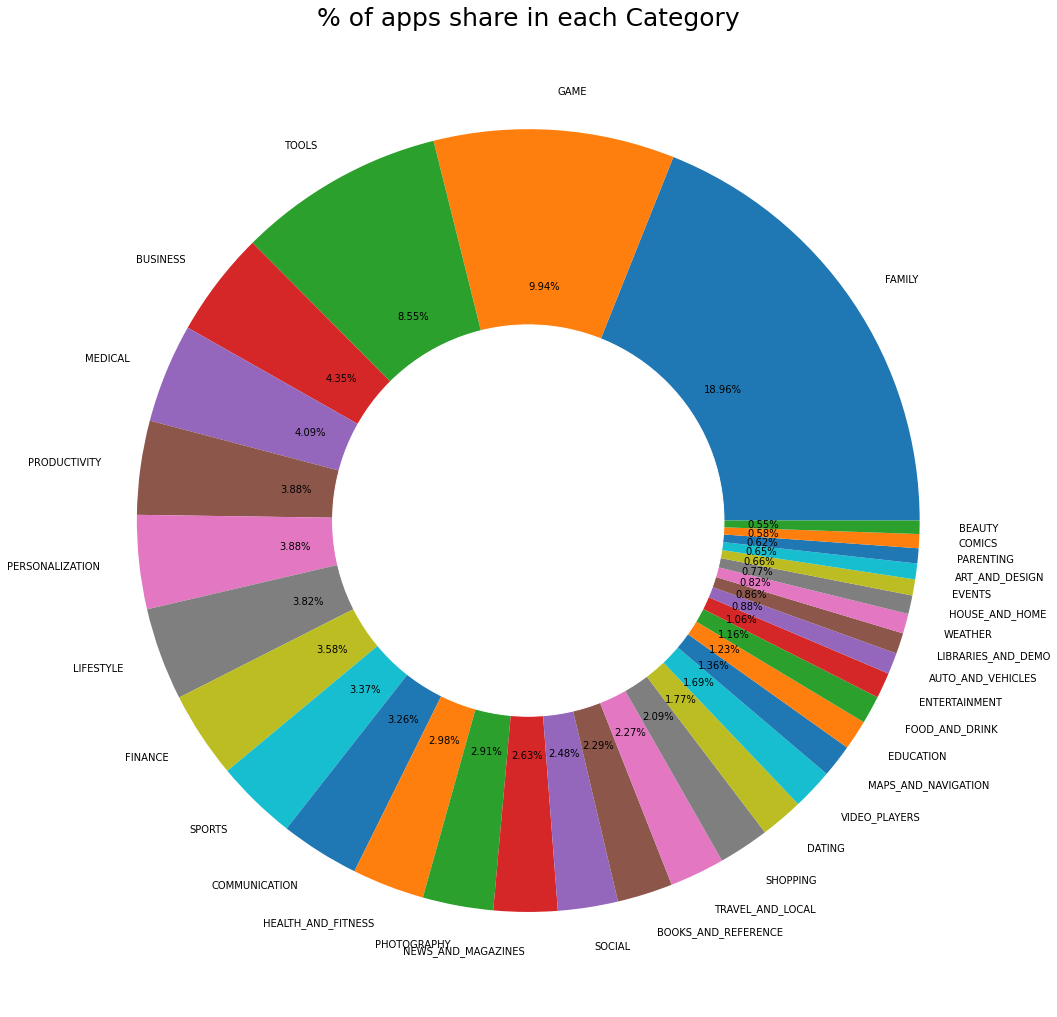

In [64]:
# App share category wise:
plt.figure(figsize=(18,18))
plt.pie(playstore_data.Category.value_counts(), labels=playstore_data.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

In [65]:
# finding top 5 categories:


Top_5_category = playstore_data["Category"].value_counts(ascending = False).head()

In [66]:
Top_5_category

FAMILY      1829
GAME         959
TOOLS        825
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64

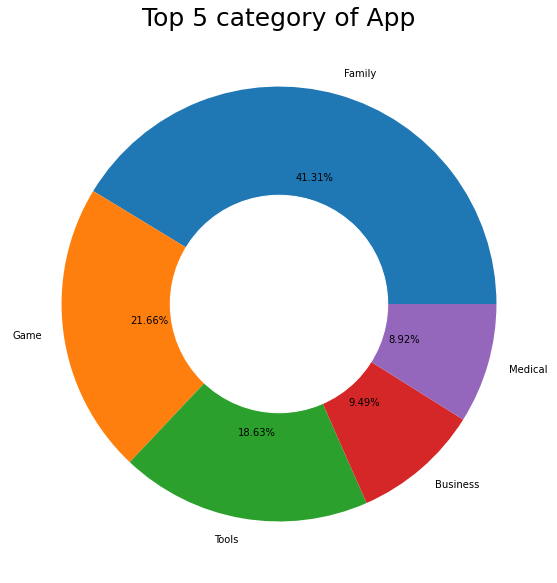

In [67]:
# % share of app out of Top 5 Category
plt.figure(figsize=(15,10))
labels = ["Family"  , "Game","Tools","Business","Medical"]
plt.pie(Top_5_category, labels = labels,autopct='%1.2f%%')
# xlabel = playstore_data.Category.value_counts() 
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top 5 category of App', fontsize = 25)
# plt.legend("Family" , "Game","Tools","Business","Medical")
plt.show()

Inference:

we see that family holds 18.97%(1829) of all of them, while games and tools account for 9.93%(959) and 8.56%(825) respectively.

## **2.What category of app is most installed by users?**

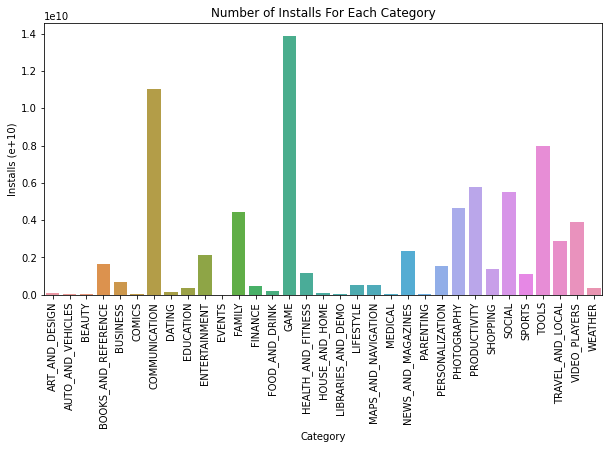

In [68]:
categories = playstore_data.groupby("Category")
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

Inference:

User tends to install Games more than any other type of apps. 
Games and communication has the maximum numbers of installs.

# 3.Which category has the highest rating?

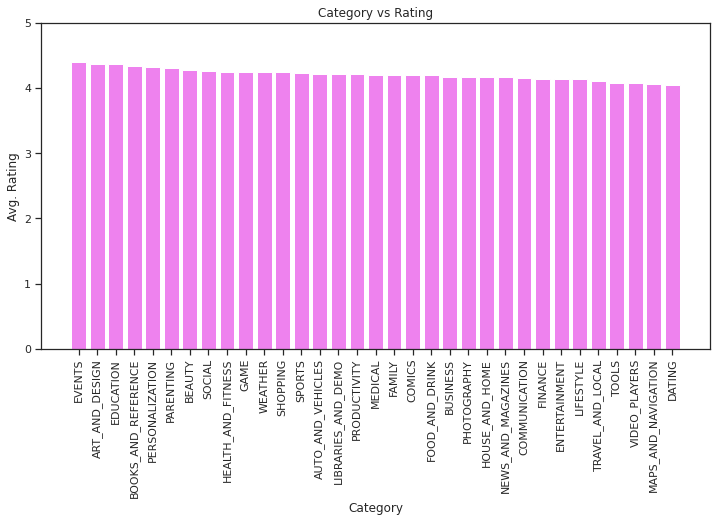

In [91]:
# Grouping the apps category wise;
category_group = playstore_data.groupby('Category')
categories = playstore_data.Category.unique()
     
# rating:
rating = pd.DataFrame(round(category_group['Rating'].mean(),2).sort_values(ascending = False))
     

fig = plt.figure(figsize = (12,6))
plt.bar(rating.index, rating['Rating'], color = 'violet')
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.ylabel('Avg. Rating')
plt.yticks(range(0,6,1))
plt.title('Category vs Rating')
plt.show()
fig.savefig('Category vs Rating')

Inference:

As we can see there is no huge or noticable difference in the rating of categories.

# 4.What is the average Ratings of Apps ?

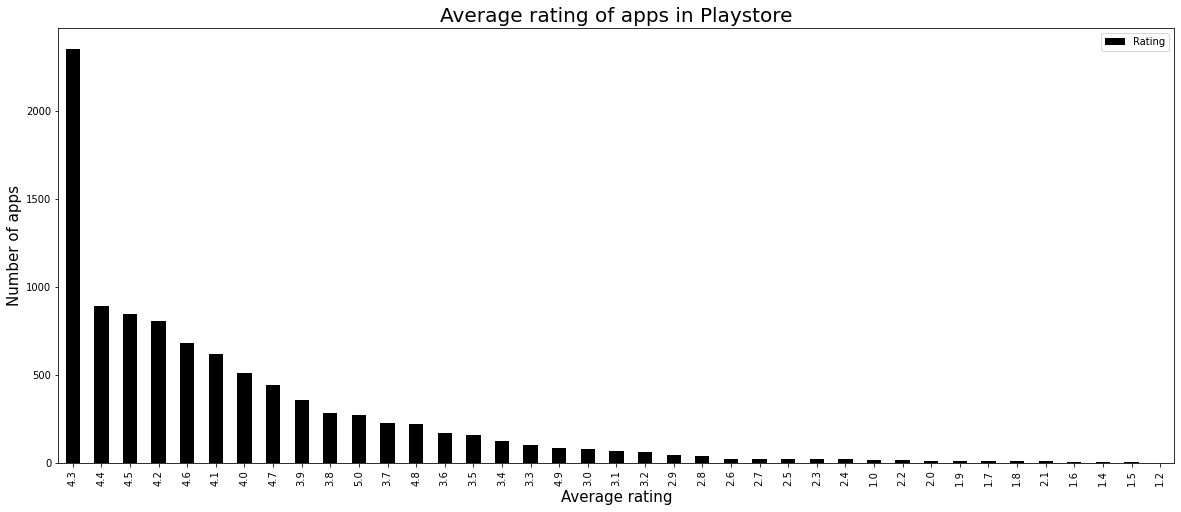

In [70]:
playstore_data['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'k' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend();

From the Above visual we can see that most of the people have given top Ratings between 3.5 to 4.8

4-5: Top rated

3-4: Above average

2-3: Average

1-2: Below average

# **5. What is the count of Free And Paid apps?**

AttributeError: ignored

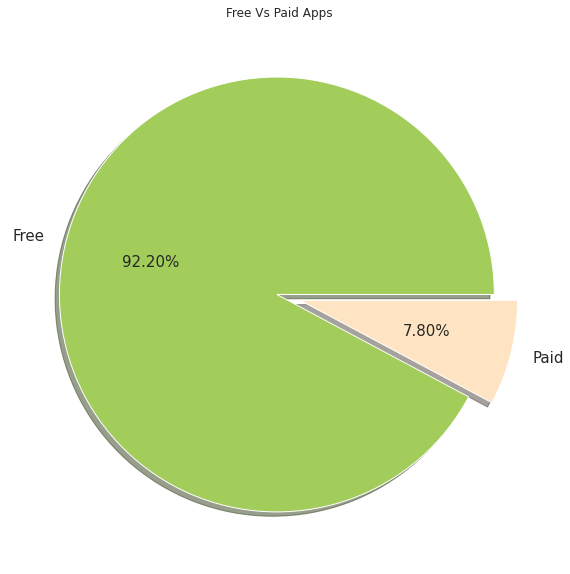

In [93]:
paid_else_free=playstore_data['Type'].value_counts()
labels=playstore_data['Type'].value_counts().index

#create pie chart 
plt.figure(figsize=(12,10))
colors=['#A2CD5A','#FFE4C4']
explode=(0.01,0.1)
plt.pie(paid_else_free,labels=labels,colors=colors,autopct='%.2f%%',explode=explode,shadow=True,textprops={'fontsize': 15})
plt.title('Free Vs Paid Apps',Size=20)
plt.show()


In [103]:
# count
playstore_data['Type'].value_counts()

Free    8896
Paid     753
Name: Type, dtype: int64

Inference:

From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

From the above data, we also see value counts of free and paid apps.

# **6. Which apps generated maximum revenue?**

In [96]:
# Creating new Dataframe with name paid_app:

paid_app = playstore_data[playstore_data["Type"]== "Paid"]

In [97]:
# adding a new column Revenue in the paid_app
paid_app["Revenue"] = paid_app["Installs"]*paid_app["Price"]

<ipython-input-97-31dbdf4141b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_app["Revenue"] = paid_app["Installs"]*paid_app["Price"]


In [98]:
Top_5_Revenue = paid_app["Revenue"].sort_values(ascending = False)

Top_5_Revenue.head(5)

2241    69900000.0
5351    39999000.0
5356    19999500.0
4034     9900000.0
7417     6990000.0
Name: Revenue, dtype: float64

In [99]:
Top_10_paid_apps=paid_app.nlargest(10, 'Revenue', keep='first')
Top_10_paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


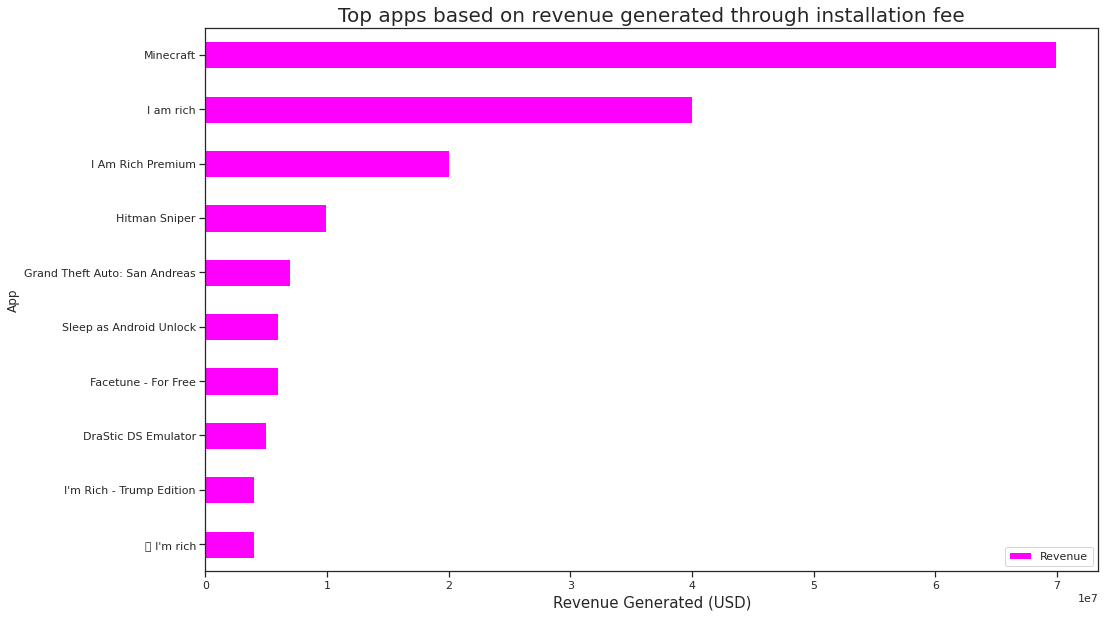

In [101]:
# plotting the most profitable apps:

Top_10_paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='fuchsia')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend();

Inference:

Top 10 Earning Apps are below in Google -

Minecraft

I am rich

I Am Rich Premium

Hitman Sniper

Grand Theft Auto: San Andreas

Facetune - For Free

Sleep as Android Unlock

DraStic DS Emulator

I'm Rich - Trump Edition

💎 I'm rich

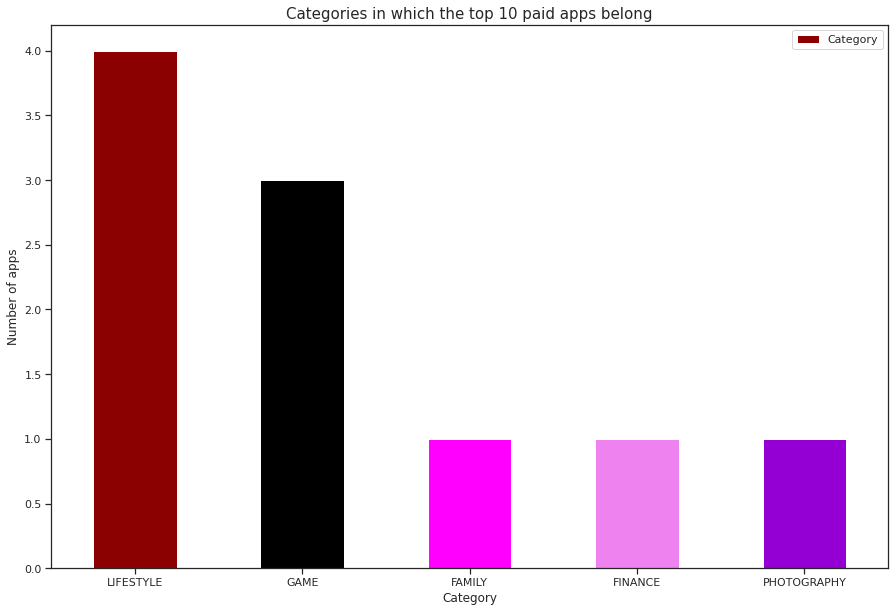

In [102]:
# Categories having apps that generated revenue:

Top_10_paid_apps['Category'].value_counts().plot.bar(figsize=(15,10), color= ["darkred", "black", "fuchsia", "violet", "darkviolet"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

As we can see user spend money on the app related lifestyle and there are users or gamers who spend most money on games.

# 7. which Content is most popular on Playstore?

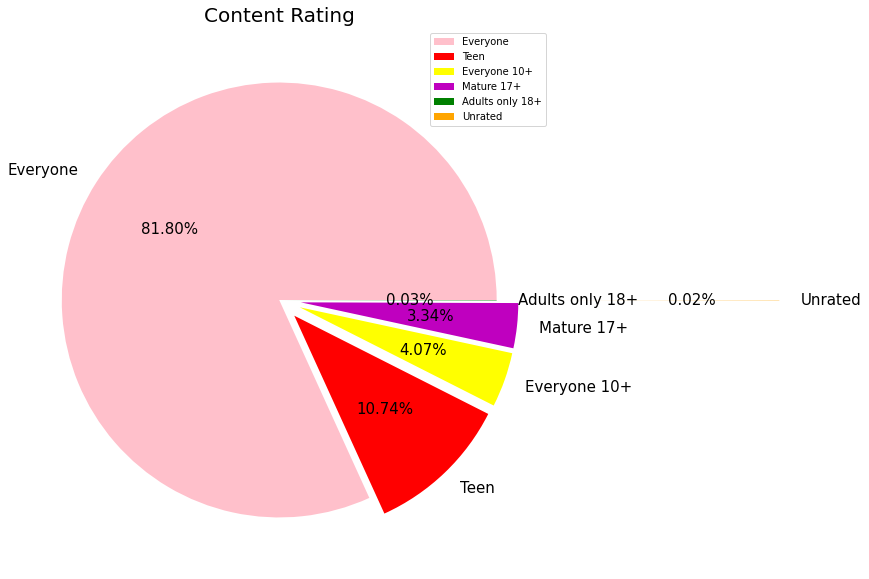

In [80]:
data = playstore_data['Content Rating'].value_counts()
label = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['pink', 'r', 'yellow', 'm', 'g', 'orange']
plt.pie(data, labels = label, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

In [104]:
playstore_data["Content Rating"].value_counts()


Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

As we can see most of the content belongs to Everyone.

# 8. Distribution of apps in term of their rating, size and type.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size', ylabel='Rating'>

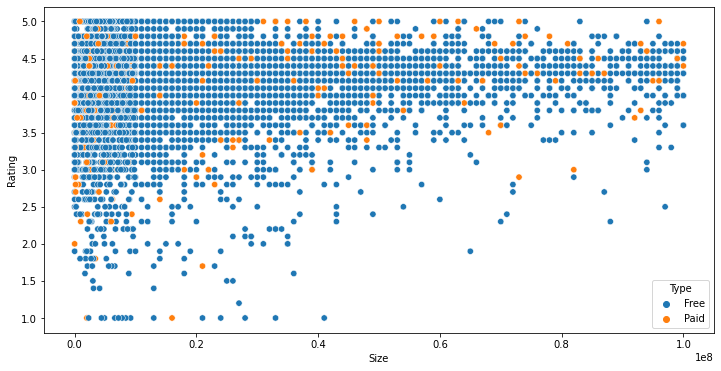

In [81]:

plt.figure(figsize=(12, 6))
sns.scatterplot(playstore_data['Size'], playstore_data['Rating'],hue=playstore_data['Type'],s=40)

Inference : its clearly seen here that the most of the apps are less in size and has higher rating.

# 9. Which app has the highest number of reviews?

In [82]:
highest_reviewed_app = playstore_data.sort_values( by = "Reviews" , ascending  = False)

In [83]:
highest_reviewed_app["App"].head(20)

2544                                             Facebook
336                                    WhatsApp Messenger
2545                                            Instagram
335              Messenger – Text and Video Chat for Free
1670                                       Clash of Clans
4005              Clean Master- Space Cleaner & Antivirus
1654                                       Subway Surfers
3665                                              YouTube
7536    Security Master - Antivirus, VPN, AppLock, Boo...
1660                                         Clash Royale
1655                                     Candy Crush Saga
378           UC Browser - Fast Download Private & Secure
2550                                             Snapchat
4568      360 Security - Free Antivirus, Booster, Cleaner
1722                                       My Talking Tom
1675                                          8 Ball Pool
8896    DU Battery Saver - Battery Charger & Battery Life
406           

Text(0.5, 1.0, 'Top 20 apps with the highest number of user reviews')

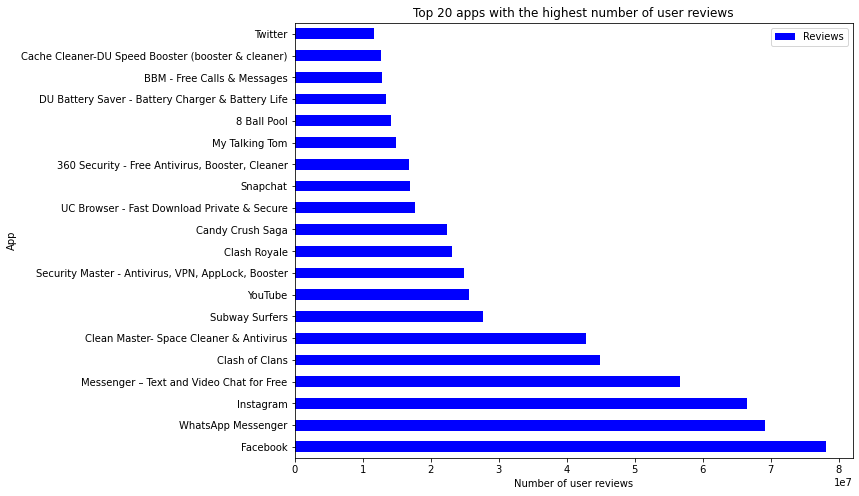

In [84]:
playstore_data.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (10,8), color = 'blue')
plt.xlabel('Number of user reviews')
plt.title('Top 20 apps with the highest number of user reviews')

Inference:

We can conclude that "Facebook", "WhatsApp Messenger", "Instagram" are the top three apps have highest reviews.

# **10. Correlation between all the columns of the datasets.**

In [85]:
playstore_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050212,0.027351,0.034306,-0.018674
Reviews,0.050212,1.000000,0.037814,0.625158,-0.007603
Size,0.027351,0.037814,1.000000,-0.007568,-0.015089
Installs,0.034306,0.625158,-0.007568,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.015089,-0.009412,1.000000


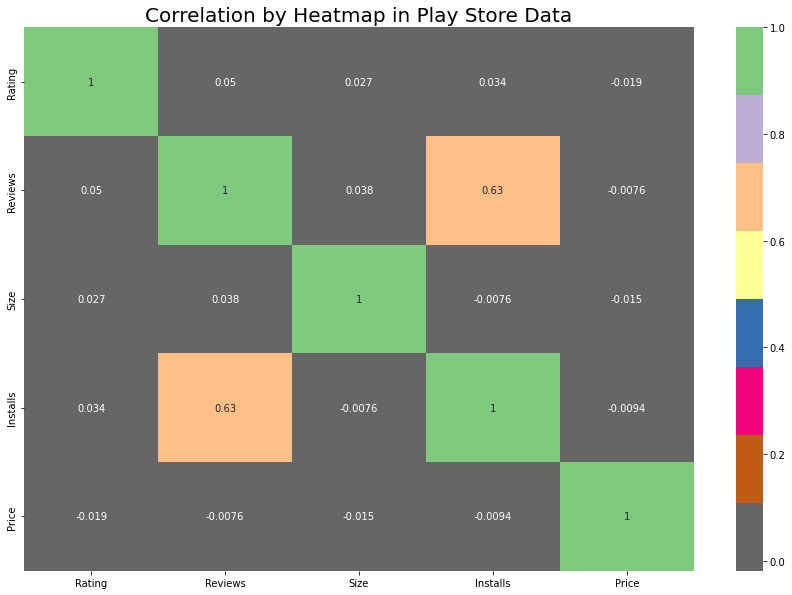

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(playstore_data.corr(),annot=True, cmap='Accent_r')
plt.title("Correlation by Heatmap in Play Store Data",size='20');

Clearly, we can see that reviews and installs are more correlated and the value is 0.64.
 It is much more obvious that a higher number of installs has a higher number of reviews.

There is a negative correlation between price and install, with the price of the app influencing the number of installation of the app.

## Data Visualization Based on Users Review Dataset:

In [87]:
user_rv.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

# 11. What is the Percentage of Sentiment Reviews?

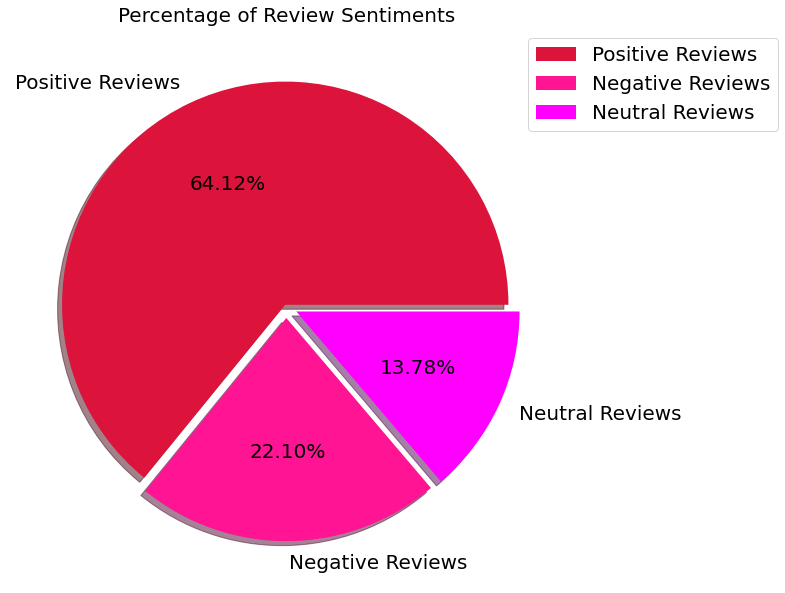

In [88]:
sentiment = list(user_rv['Sentiment'].value_counts())
labels = ['Positive Reviews','Negative Reviews','Neutral Reviews']
colors = ['crimson','deeppink','fuchsia']
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 15)
plt.pie(sentiment, labels=labels, explode=[0.01, 0.05, 0.05],colors=colors, shadow=True, autopct='%.2f%%')
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

Percentage of Review Sentiments-:

Positive Reviews = 64.12%

Negative Reviews = 22.10%

Neutral Reviews = 13.78%

# 12. Analysis of Sentiments based on category

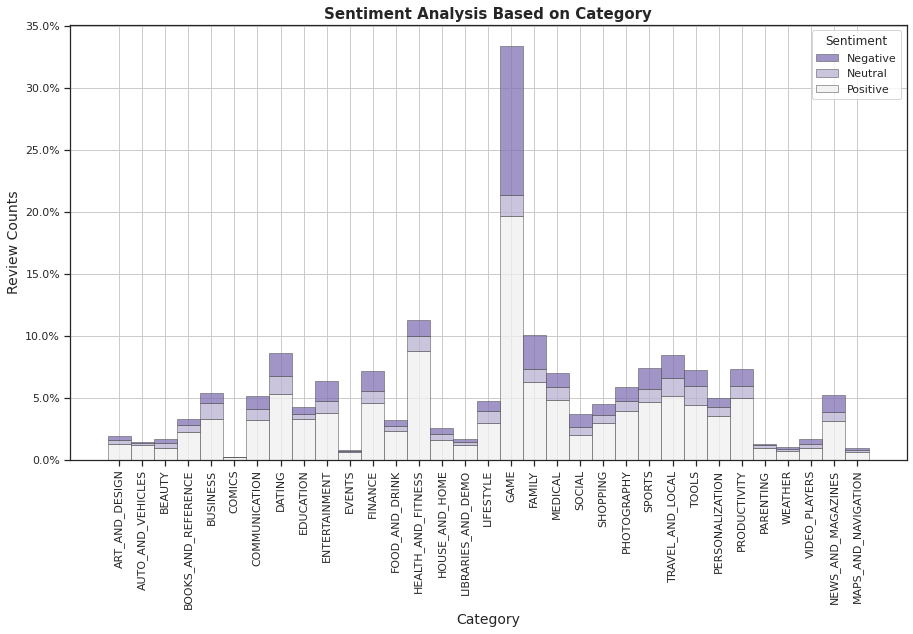

In [105]:
# merging the two Dataset
from matplotlib.ticker import PercentFormatter
merged_df = pd.merge(playstore_data, user_rv, on='App', how = 'inner')
merged_df.head()
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)


sns.histplot(
    data=merged_df,
    x="Category", hue="Sentiment",
    bins=34,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    legend=True
    )


ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=14)
ax.set_ylabel("Review Counts",fontsize=14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()

Inference:

Here we notice that most of the reaction are from category that is 'Game'  and very less from 'Comics', 'Events', 'Maps_And_Navigation' and 'Weather'.

-This shows that people take much interest in Game catagory app as compare to other apps.

# 13. Is sentiment_subjectivity proportional to sentiment_polarity ?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


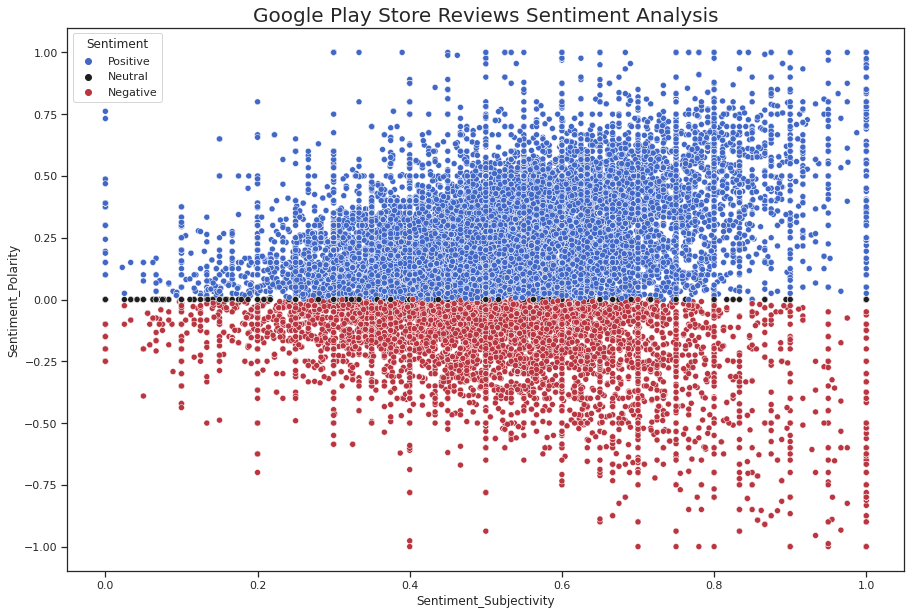

In [90]:
plt.figure(figsize=(15, 10))
sns.scatterplot(user_rv['Sentiment_Subjectivity'], user_rv['Sentiment_Polarity'],
                hue = user_rv['Sentiment'], edgecolor='white', palette="icefire")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show();

Inference:

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

## Conclusion of the whole Analysis:

In this project of analysing play store applications, we have worked on several parameters and got some actionable insights that would help any organisation to do well in the Android market.

As per the EDA , we can conclude the following points:

1. Family is the most popular category in the playstore followed by Games and tools.
2. User tends to install Games more than any other type of apps. Games and communication has the maximum numbers of installs.

3.  when we compare rating with category, we can say that almost all the categories has similar rating.
4. Next we come to the average rating of the app, and we saw that most of the people have given top ratings of between 3.5 and 4.8.

5. From the analysis, we can saw that 92% (8896) of apps in google play store are free and 8% (753) are paid. 
6. When it comes to paid app , minecraft has generated the maximum revenue of $69900000

7. Most of the applications are belongs to “Everyone” which means not restricted to age.Focusing more on content available for Everyone will increase the chances of getting the highest installs.
8.we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.So we concentrated on free apps and sizes that are compatible with every Android device

9. We can conclude that "Facebook", "WhatsApp Messenger", "Instagram" are the top three apps have highest reviews.
10. We also found any correlation between all the columns and we found that installs and reviews are highly correlated, which concludes that a high number of installs has the highest number of reviews.

11. After analysis of user's sentiments, we found that the Positive reviews are large in number while negative and neutral reviews has lower number.
12. when we analysed the sentiments based on categories we got to know most of the reaction are from 'Game' catagory and very less from 'Comics', 'Events', 'Maps_And_Navigation' and 'Weather'.
i.e. it shows that people take more interest in Game catagory app as compare to other apps.

13. From the scatter plot of sentiments it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

Hence , these are the points that a App developer can keep in consideration that would help while developing a application